In [1]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%autoreload 2 

In [3]:
%matplotlib inline

In [4]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [5]:
import pickle
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr as PearsonR
import sys
import h5py
from matplotlib.mlab import bivariate_normal

In [6]:
sys.path.append("../")

In [7]:
import plot_gal_prop as pg
import extract_catalog as ec
import get_gal_centroids as get_gal

In [8]:
f = h5py.File("../../data/" + 
              "Illustris-1_fof_subhalo_myCompleteHaloCatalog_00135.hdf5")

In [9]:
clstDF_list = map(lambda i: ec.extract_clst(f, i), range(129))

In [10]:
clstDF_list[0].keys()

Index([u'SubhaloGrNr', u'SubhaloLenType0', u'SubhaloLenType1', u'SubhaloLenType2', u'SubhaloLenType3', u'SubhaloLenType4', u'SubhaloLenType5', u'SubhaloMass', u'SubhaloMassType0', u'SubhaloMassType1', u'SubhaloMassType2', u'SubhaloMassType3', u'SubhaloMassType4', u'SubhaloMassType5', u'SubhaloPos0', u'SubhaloPos1', u'SubhaloPos2', u'U_band', u'B_band', u'V_band', u'K_band', u'g_band', u'r_band', u'i_band', u'z_band', u'SubhaloStellarPhotometricsMassInRad'], dtype='object')

In [11]:
suffix = "_wwt"

In [12]:
fhat_list = pickle.load(open('../../data/fhat_I_lum.pkl'))

In [13]:
fhat_list[0].keys()

['gridtype',
 'bandwidth_matrix_H',
 'peaks_ycoords',
 'peaks_xcoords',
 'gridded',
 'weight_w',
 'binned',
 'peaks_colIx',
 'names',
 'estimate',
 'data_x',
 'eval_points',
 'peaks_rowIx',
 'peaks_dens']

In [14]:
eval_points1 = fhat_list[0]["eval_points"][0]
eval_points2 = fhat_list[0]["eval_points"][1]

In [15]:
R200C = f["Group"]["Group_R_Crit500"][:129]

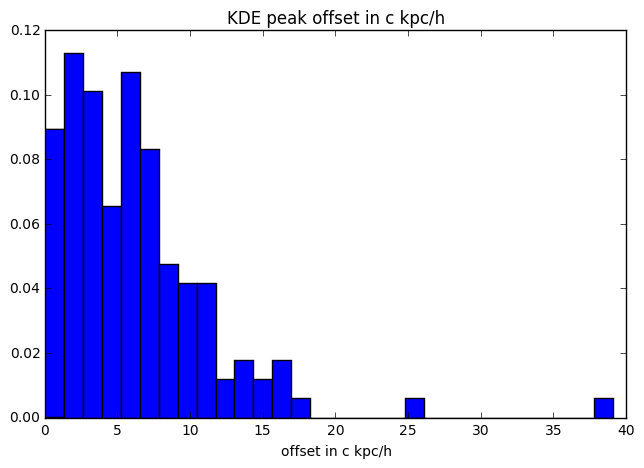

In [34]:
_, _, _ = plt.hist(offset_list[:, 0], normed=True, 
                   bins=30)
plt.title('KDE peak offset in c kpc/h')
plt.xlabel('offset in c kpc/h')

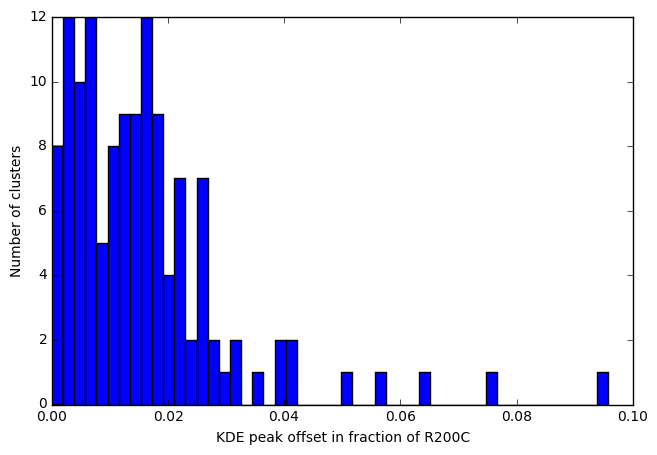

In [18]:
_, _, _ = plt.hist(offset_list[:, 1],
                   bins=50)
plt.xlabel('KDE peak offset in fraction of R200C')
plt.ylabel('Number of clusters')
plt.savefig('../plots/KDE_peak_mostBound_offset_full_range.png', 
            bbox_inches='tight', dpi=150)

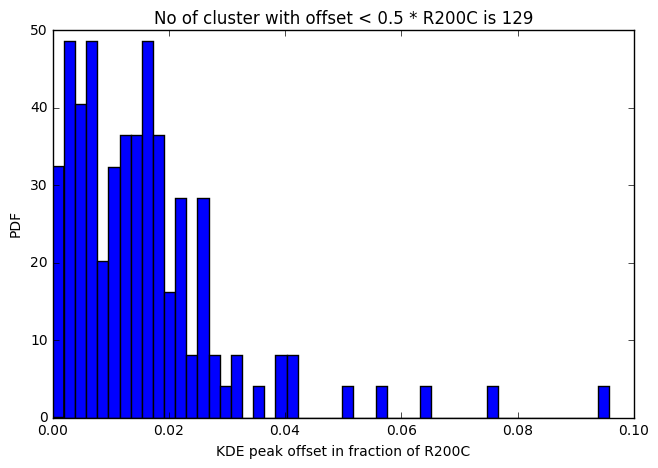

In [36]:
mask = offset_list[:, 1] < 0.5
_, _, _ = plt.hist(offset_list[:, 1], normed=True,
                   bins=50)
plt.title("No of cluster with offset < 0.5 * R200C is {0}".format(np.sum(mask)))
plt.xlabel('KDE peak offset in fraction of R200C')
plt.ylabel('PDF')
plt.savefig('../plots/KDE_peak_mostBound_offset_zoomed.png', 
            bbox_inches='tight', dpi=150)

In [20]:
np.sum(mask) / 129.

1.0

Look at the correlation of the relaxedness and the offset in R200C

In [21]:
pearsonr, pvalue = PearsonR(relaxedness_list, 
                            offset_list[:, 1])

NameError: name 'relaxedness_list' is not defined

In [26]:
print "pearson R coefficient is {0}".format(pearsonr)
print "p value is ... {0}".format(pvalue)

pearson R coefficient is 0.341108632625
p value is ... 7.6260601933e-05


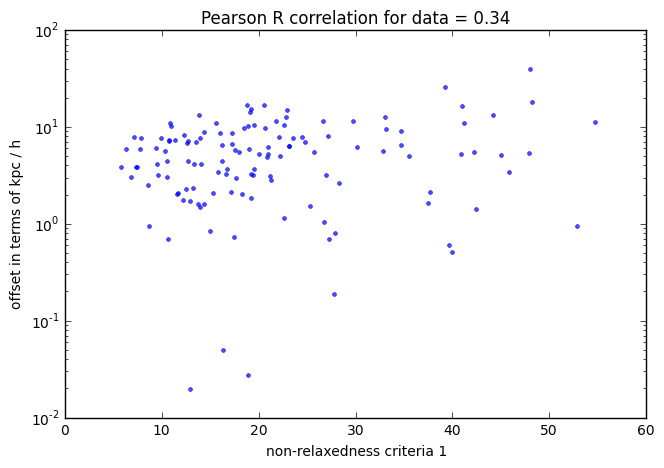

In [24]:
#plt.semilogy(relaxedness_list, offset_list[:, 0], 'r.', alpha=0.7)
plt.semilogy(relaxedness_list, offset_list[:, 0], 'b.', alpha=0.7)
plt.xlabel("non-relaxedness criteria 1")
plt.ylabel("offset in terms of kpc / h ")
plt.title("Pearson R correlation for data " + 
          "= {0:.2f}".format(pearsonr))
plt.savefig("../plots/relaxednessVSOffsetInR200C.png", 
            bbox_inches="tight", dpi=200)

not very correlated ... 

# Look at the KDE maps from ks_KDE.r

In [16]:
fhat_dict = fhat_list

In [17]:
fhat_dict[0].keys()

['gridtype',
 'bandwidth_matrix_H',
 'peaks_ycoords',
 'peaks_xcoords',
 'gridded',
 'weight_w',
 'binned',
 'peaks_colIx',
 'names',
 'estimate',
 'data_x',
 'eval_points',
 'peaks_rowIx',
 'peaks_dens']

In [18]:
fhat = fhat_dict[0]

In [23]:
_ = map(get_gal.get_density_weights, fhat_dict) 

In [20]:
for i in range(20):    
    pg.plot_KDE_peaks(fhat_dict[i], allPeaks=True, 
                      R200C=R200C[i], showData=False,
                      clstNo=i, save=True)
    plt.close()

## Examine super outlier i.e. offset > 2 * R200C

In [42]:
super_outlier_mask = offset_list[:, 1] > 2.0

In [43]:
peak_no_list = [len(fhat["peaks_dens"]) for fhat in fhat_list]

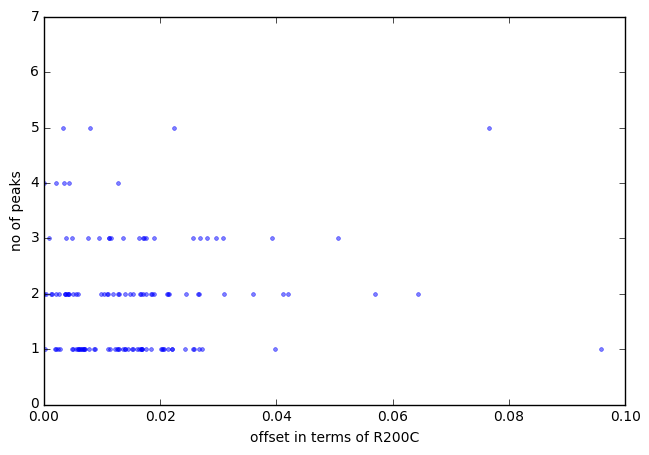

In [44]:
plt.plot(offset_list[:, 1], peak_no_list, ".", alpha=0.5)
plt.ylim((0, 7))
plt.xlabel('offset in terms of R200C')
plt.ylabel('no of peaks')
plt.savefig("../plots/peakNoVsoffsetR200C_no_weights.png",
            bbox_inches='tight')


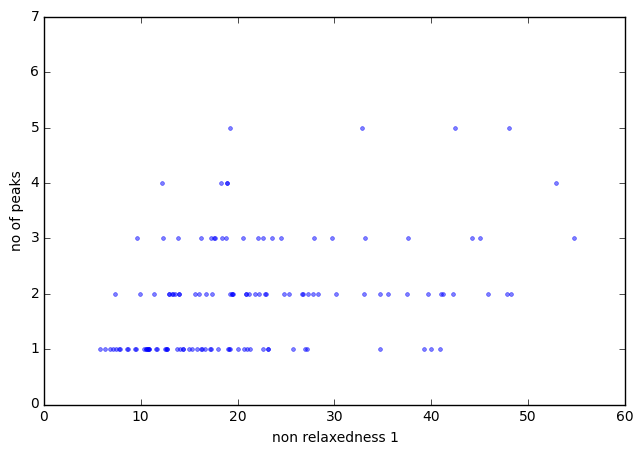

In [45]:
plt.plot(relaxedness_list, peak_no_list, ".", alpha=0.5)
plt.ylim((0, 7))
plt.xlabel('non relaxedness 1')
plt.ylabel('no of peaks')
plt.savefig("../plots/peakNoVsRelaxedness_no_weights.png",
            bbox_inches='tight')

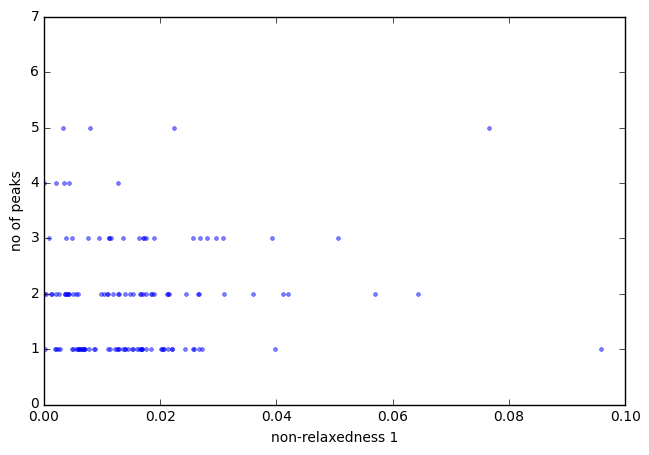

In [46]:
plt.plot(offset_list[:, 1], peak_no_list, ".", alpha=0.5)
plt.ylim((0, 7))
plt.xlabel('non-relaxedness 1')
plt.ylabel('no of peaks')

In [47]:
outlier_mask = np.logical_and(offset_list[:, 1] > 0.5, 
                              offset_list[:, 1] < 2.0)

In [48]:
fhat_dict[0].keys()

['gridtype',
 'bandwidth_matrix_H',
 'peaks_ycoords',
 'peaks_xcoords',
 'gridded',
 'weight_w',
 'binned',
 'peaks_colIx',
 'names',
 'estimate',
 'data_x',
 'eval_points',
 'peaks_rowIx',
 'peaks_dens']